## Vasundhra Bisht 

### Exploratory Data Analysis-Retail 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_080533e61ad54b02b084b57c003da841 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_080533e61ad54b02b084b57c003da841 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_080533e61ad54b02b084b57c003da841 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_IVktgeeKq9w2As4PEDGgXJZ_kVfFmc69TN0E0Igc5wS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_080533e61ad54b02b084b57c003da841)

body = client_080533e61ad54b02b084b57c003da841.get_object(Bucket='grip-donotdelete-pr-naqvlenqwwmxhx',Key='SampleSuperstore.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Listing the count of categorical variables 

In [6]:
categorical_variables=['Segment','State','Category','Ship Mode']
for col in categorical_variables:
    count=df[col].value_counts()
    print(count)
    print(" ")

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
 
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Dropping unimportant columns. 

In [8]:
df = df.drop(['Country','Postal Code'], axis=1)

In [9]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Dropping NA values. 

In [10]:
df= df.dropna(axis=0)
df.shape

(9994, 11)

Here, we see that there are no null values present.

In [11]:
corr=df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


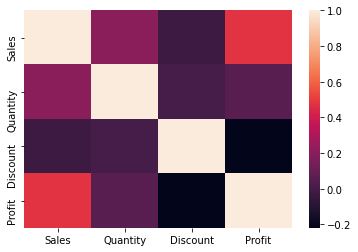

In [12]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### We can see that there is a negative correlation between Discount and Profit, no correlation between Sales and Discount and positive correlation between Profit and Sales.

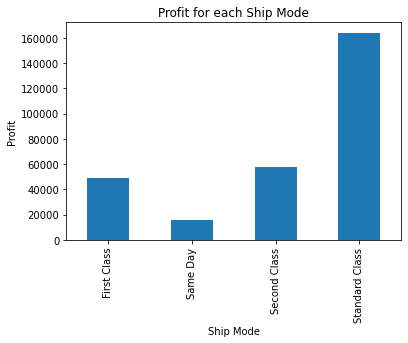

In [13]:
df1= df.groupby('Ship Mode',axis=0).sum()
df1['Profit'].plot(kind='bar')
plt.title("Profit for each Ship Mode")
plt.ylabel("Profit")
plt.show()

#### Profit is maximum for Standard Class. 

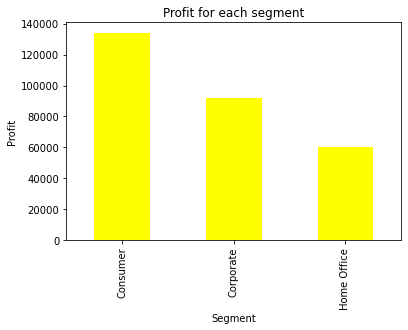

In [16]:
df2= df.groupby('Segment',axis=0).sum()
df2['Profit'].plot(kind='bar',color='yellow')
plt.title("Profit for each segment")
plt.ylabel("Profit")
plt.show()

#### Profit is maximum for 'Consumer' segment.

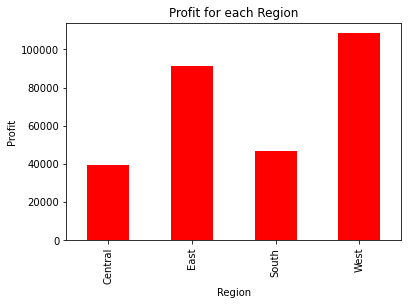

In [17]:
df3= df.groupby('Region',axis=0).sum()
df3['Profit'].plot(kind='bar',color='red')
plt.title("Profit for each Region")
plt.ylabel("Profit")
plt.show()

#### Profit is maximum for West region. 

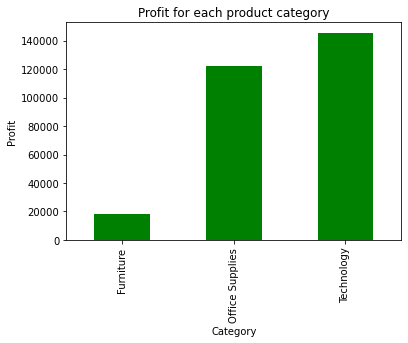

In [22]:
df4= df.groupby('Category',axis=0).sum()
df4['Profit'].plot(kind='bar',color='green')
plt.title("Profit for each product category")
plt.ylabel("Profit")
plt.show()

   #### Profit is maximum for 'Technology' product category. 

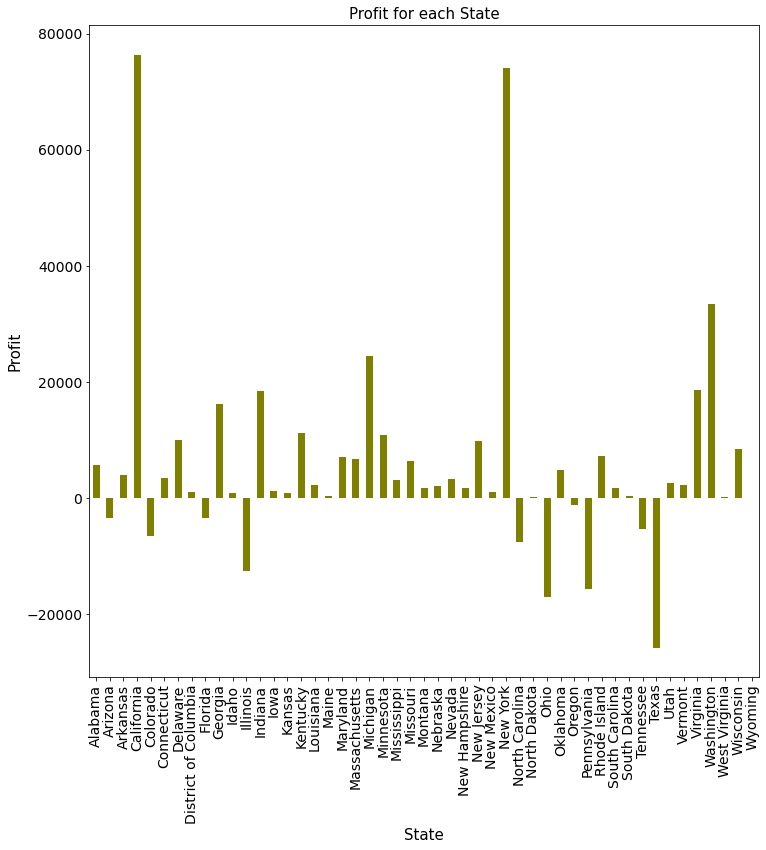

In [21]:
plt.figure(figsize=(12,12))
df5= df.groupby('State',axis=0).sum()
df5['Profit'].plot(kind='bar', color='olive')
plt.title("Profit for each State", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

####  California accounts for maximum profit followed by New York whereas Texas accounts for maximum loss.

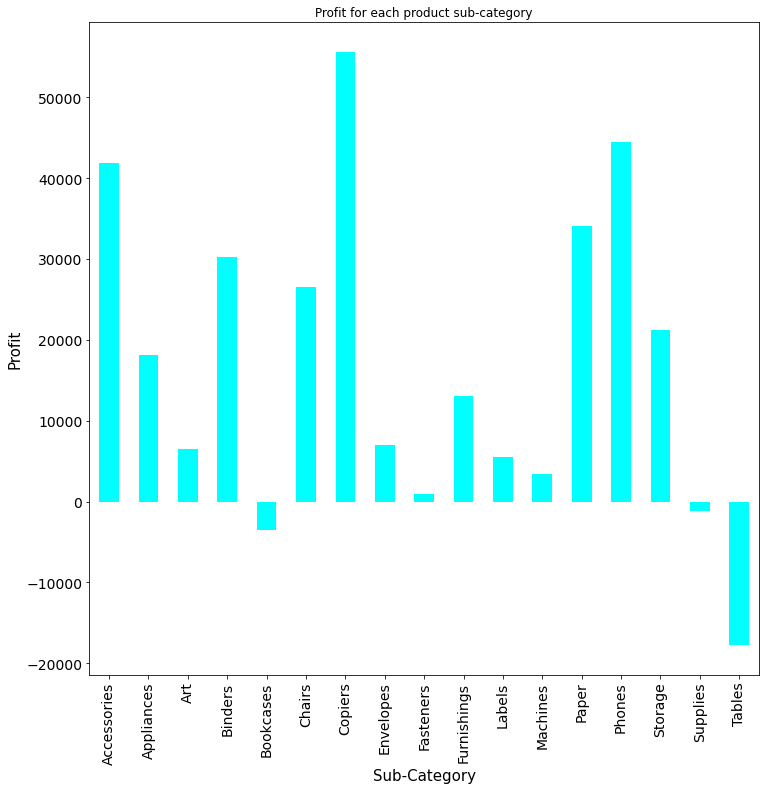

In [27]:
plt.figure(figsize=(12,12))
df6= df.groupby('Sub-Category',axis=0).sum()
df6['Profit'].plot(kind='bar',color='cyan')
plt.title("Profit for each product sub-category")
plt.xlabel("Sub-Category", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

#### Next, we find the category matching to each sub-category. 

In [42]:
F1=df.set_index('Category')
f=pd.DataFrame(F1['Sub-Category'])
f.drop_duplicates()

,Sub-Category
Category,
Furniture,Bookcases
Furniture,Chairs
Office Supplies,Labels
Furniture,Tables
Office Supplies,Storage
Furniture,Furnishings
Office Supplies,Art
Technology,Phones
Office Supplies,Binders


#### The sub category "Copiers" brings maximum profit which is consistent with the fact that maximum profit is brought in by "Technology" category. Also, maximum loss is suffered by the category "Tables" which lies under the "Furniture" category that brings in the least profit.  

#### Weak areas where profit can be increased:

Texas, Ohio, Pennsylvania, Illinois are some of the states that account for great losses, hence it should be made sure to improve business in these states by studying the customer behaviour in depth and by managing the inventory/ capital acccordingly 

#### Business problems encountered : 

As it is evident from the heatmap, thereis a negative relationship between Discount and Profit, so it should be made sure that in areas of maximum loss, the number of discounts offered should be less. But still some discounts should still be offered in  order to attract customers so that it boosts up sale which in turn increases the profit as profit and sales are positively correlated.